# 疫情相关中文新闻分析

 ## 数据加载

In [17]:
import os
import json
import pandas as pd

# 数据文件夹路径
news_data_dir = 'data/news/data/'
comment_data_dir = 'data/news/comment/'

# 加载新闻数据
def load_news_data(data_dir):
    news_data = []
    files = sorted(os.listdir(data_dir))
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(data_dir, file), 'r', encoding='utf-8') as f:
                daily_news = json.load(f)
                for news in daily_news:
                    news_entry = {
                        'time': news.get('time', 'NULL'),
                        'title': news.get('title', 'NULL'),
                        'url': news.get('url', 'NULL'),
                        'content': news.get('meta', {}).get('content', 'NULL'),
                        'description': news.get('meta', {}).get('description', 'NULL'),
                        'keyword': news.get('meta', {}).get('keyword', 'NULL'),
                        'meta_title': news.get('meta', {}).get('title', 'NULL'),
                        'type': news.get('meta', {}).get('type', 'NULL')
                    }
                    news_data.append(news_entry)
    return pd.DataFrame(news_data)

# 加载评论数据
def load_comment_data(data_dir):
    comment_data = []
    files = sorted(os.listdir(data_dir))
    for file in files:
        if file.endswith('.txt'):
            with open(os.path.join(data_dir, file), 'r', encoding='utf-8') as f:
                daily_comments = json.load(f)
                for comment in daily_comments:
                    for com in comment.get('comment', []):
                        comment_entry = {
                            'news_time': comment.get('time', 'NULL'),
                            'news_title': comment.get('title', 'NULL'),
                            'news_url': comment.get('url', 'NULL'),
                            'comment_area': com.get('area', 'NULL'),
                            'comment_content': com.get('content', 'NULL'),
                            'comment_nickname': com.get('nickname', 'NULL'),
                            'comment_reply_to': com.get('reply_to', 'NULL'),
                            'comment_time': com.get('time', 'NULL')
                        }
                        comment_data.append(comment_entry)
    return pd.DataFrame(comment_data)

# 加载数据
news_df = load_news_data(news_data_dir)
comment_df = load_comment_data(comment_data_dir)

# 展示加载的数据
print(f"新闻数据长度：{len(news_df)},评论数据：{len(comment_df)}")

新闻数据长度：502550,评论数据：1534616


In [2]:
news_df

,time,title,url,content,description,keyword,meta_title,type
0,01-01 00:00,担忧情绪消散 商品有望迎来2016年来表现最好的一年,https://finance.sina.com.cn/stock/usstock/c/20...,大宗商品将创下自2016年以来的最佳年度表现，原油到铜的年度收益将有所增长。 彭博商品指数创...,担忧情绪消散 商品有望迎来2016年来表现最好的一年,[],担忧情绪消散 商品有望迎来2016年来表现最好的一年,news
1,01-01 00:01,国泰君安贺青：奋进新时代 共建健康繁荣的资本市场,https://finance.sina.com.cn/stock/roll/2020-01...,国泰君安党委书记贺青：奋进新时代 共建持续健康繁荣的资本市场 贺青 国泰君安证券 “党的十九...,国泰君安贺青：奋进新时代 共建健康繁荣的资本市场,"[资本市场, 国泰君安]",国泰君安贺青：奋进新时代 共建健康繁荣的资本市场,news
2,01-01 00:02,新京报社论：穿越大江大河,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,原标题：穿越大江大河 时光不恋过往，大江永远奔腾。你好，2020年！你好，下一个十年！ 当2...,江大河时光不恋过往，大江永远奔腾。你好，2020年！你好，下一个十年！当2019年底新开通的...,[元旦],新京报社论：穿越大江大河,news
3,01-01 00:03,特朗普税收优惠政策对美国贫困地区房价影响近乎为零,https://finance.sina.com.cn/stock/usstock/c/20...,新浪美股1月1日讯 美国总统特朗普曾经强调，被新减税政策选中的低收入地区房价“飙升”，证明他...,特朗普税收优惠政策对美国贫困地区房价影响近乎为零,[],特朗普税收优惠政策对美国贫困地区房价影响近乎为零,news
4,01-01 00:03,林郑：香港这支卓越警队是特区政府最大资产之一,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,原标题：新年前一天，林郑在警总告诉警队：相信正义站在我们一边！ 林郑月娥说，香港这支卓越的警...,一天，林郑在警总告诉警队：相信正义站在我们一边！林郑月娥说，香港这支卓越的警队，是特区政府最...,[林郑月娥],林郑：香港这支卓越警队是特区政府最大资产之一,news
...,...,...,...,...,...,...,...,...
502545,08-31 18:25,麒麟芯片终结导致的连锁反应显现，华为旗下多系列手机涨价,https://tech.sina.com.cn/t/2020-08-31/doc-iivh...,原标题：麒麟芯片或“绝版” 华强北有经销商热炒华为手机：搭载麒麟芯片的普涨300 每经记者 ...,麒麟芯片终结导致的连锁反应显现，华为旗下多系列手机涨价,"[麒麟芯片, 华为]",麒麟芯片终结导致的连锁反应显现，华为旗下多系列手机涨价,news
502546,08-31 19:15,刘作虎将担任欧加控股高级副总裁 一加CEO身份不变,https://tech.sina.com.cn/t/2020-08-31/doc-iivh...,新浪科技讯 8月31日晚间消息，针对一加CEO将回归OPPO的消息，OPPO方面表示，刘作虎...,刘作虎将担任欧加控股高级副总裁 一加CEO身份不变,"[刘作虎, 一加, OPPO]",刘作虎将担任欧加控股高级副总裁 一加CEO身份不变,news
502547,08-31 14:00,信通院：2020第二季度固定宽带月户均支出为35.7元 同比下降1.7%,https://tech.sina.com.cn/t/2020-08-31/doc-iivh...,新浪科技讯 8月31日下午消息，中国信息通信研究院日前发布《中国宽带资费水平报告》显示，20...,信通院：2020第二季度固定宽带月户均支出为35.7元 同比下降1.7%,"[信通院, 宽带, 移动数据]",信通院：2020第二季度固定宽带月户均支出为35.7元 同比下降1.7%,news
502548,08-31 19:06,一加回应“刘作虎回归OPPO”：刘作虎是一加创始人和CEO身份不变,https://tech.sina.com.cn/t/2020-08-31/doc-iivh...,相关新闻：一加创始人刘作虎回归OPPO出任高级副总裁 将掌舵产品线 36氪获悉，此前消息称，...,一加回应“刘作虎回归OPPO”：刘作虎是一加创始人和CEO身份不变,"[一加, 刘作虎, OPPO]",一加回应“刘作虎回归OPPO”：刘作虎是一加创始人和CEO身份不变,news


In [3]:
comment_df

,news_time,news_title,news_url,comment_area,comment_content,comment_nickname,comment_reply_to,comment_time
0,01-01 00:03,特朗普税收优惠政策对美国贫困地区房价影响近乎为零,https://finance.sina.com.cn/stock/usstock/c/20...,福建泉州,看看消费水平就知道了，啥也别说了吧？！,手机用户3177568030,,2020-01-01 05:04:25
1,01-01 00:03,林郑：香港这支卓越警队是特区政府最大资产之一,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,湖北黄石,香港的明天会更加美好！,多瑙河畔上的木帆船,,2020-01-01 13:52:51
2,01-01 00:03,林郑：香港这支卓越警队是特区政府最大资产之一,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,郑州大学新校区,港警你们辛苦了，祝我们伟大的港警节日快乐乐！,用户6351207983,,2020-01-01 13:51:01
3,01-01 00:03,林郑：香港这支卓越警队是特区政府最大资产之一,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,浙江杭州,再赞,牛牛他爹地,,2020-01-01 13:43:40
4,01-01 00:03,林郑：香港这支卓越警队是特区政府最大资产之一,https://news.sina.com.cn/c/2020-01-01/doc-iihn...,浙江杭州,👍,牛牛他爹地,,2020-01-01 13:43:30
...,...,...,...,...,...,...,...,...
1534611,03-08 22:29,5G手机密集上市：OPPO定价5499元起，复工率达八成,https://tech.sina.com.cn/t/2020-03-09/doc-iimx...,湖北孝感,加油博主,英雄不问出处1互关,,2020-03-09 18:57:05
1534612,03-08 22:29,5G手机密集上市：OPPO定价5499元起，复工率达八成,https://tech.sina.com.cn/t/2020-03-09/doc-iimx...,广东深圳,垃圾oppo 还卖5000+ 什么狗玩意都能做高端了,开个会员改个名丶,,2020-03-09 18:11:09
1534613,03-08 22:29,5G手机密集上市：OPPO定价5499元起，复工率达八成,https://tech.sina.com.cn/t/2020-03-09/doc-iimx...,安徽蚌埠,复工率啥意思,万年小米米,,2020-03-09 18:02:02
1534614,03-08 22:29,5G手机密集上市：OPPO定价5499元起，复工率达八成,https://tech.sina.com.cn/t/2020-03-09/doc-iimx...,甘肃兰州,太贵了,小沐沐家的狗蛋儿,,2020-03-09 17:36:31


## 新闻热点追踪

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置全局字体和样式
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14 
plt.rcParams['font.family'] = ['Times New Roman', 'SimHei']

1. 新闻时间分布统计

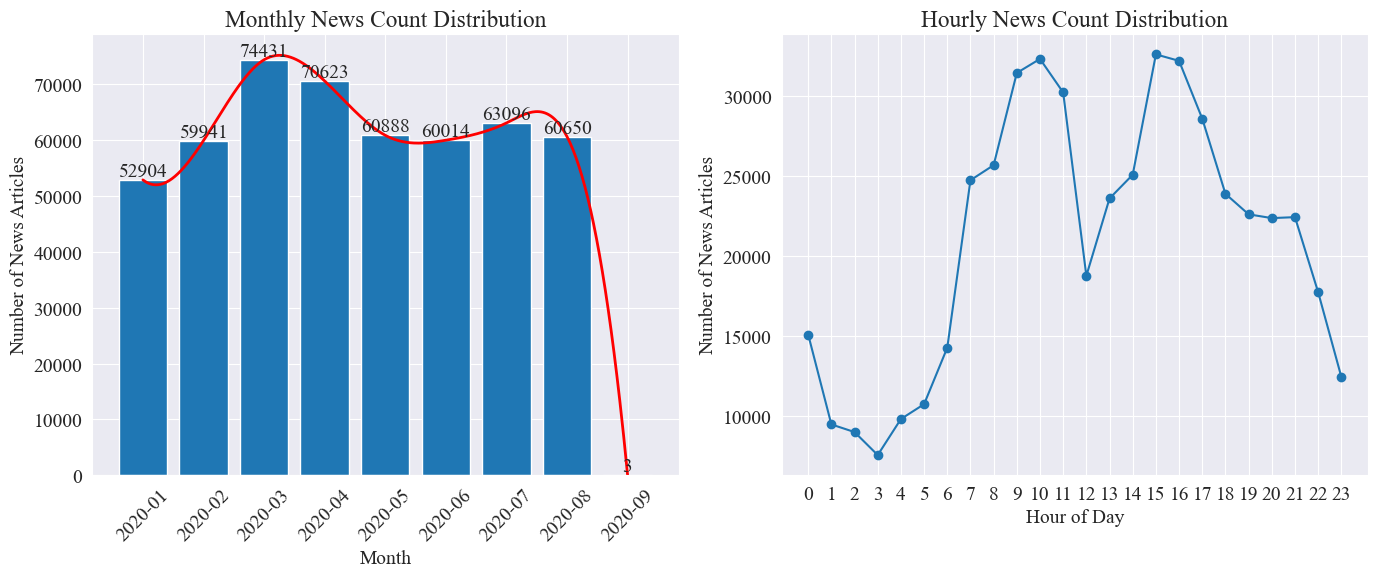

In [51]:
from collections import Counter
from datetime import datetime
from scipy.interpolate import UnivariateSpline
import numpy as np

# 提取日期和小时信息
dates = []
hours = []

for time_str in news_df['time']:
    try:
        time_obj = datetime.strptime('2020-' + time_str, '%Y-%m-%d %H:%M')
        dates.append(time_obj.strftime('%Y-%m'))  # 提取年份和月份
        hours.append(time_obj.hour)
    except ValueError:
        pass

# 统计每月新闻数量
monthly_news_count = Counter(dates)
monthly_news_count = dict(sorted(monthly_news_count.items()))

# 统计每小时新闻数量
hourly_news_count = Counter(hours)
hourly_news_count = dict(sorted(hourly_news_count.items()))

# 绘制每月新闻数量分布柱状图
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
months = list(monthly_news_count.keys())
news_counts = list(monthly_news_count.values())
bars = plt.bar(months, news_counts, label='Monthly News Count')
plt.xlabel('Month')
plt.ylabel('Number of News Articles')
plt.title('Monthly News Count Distribution')
plt.xticks(rotation=45)

# 在柱头上标出具体数据
for bar, count in zip(bars, news_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, count,
             ha='center', va='bottom')

# 绘制近似曲线
x = np.arange(len(months))
y = news_counts
spl = UnivariateSpline(x, y, s=100)
xs = np.linspace(0, len(months) - 1, 500)
ys = spl(xs)
plt.plot(xs, ys, 'r', lw=2, label='Smoothed Curve')

# 绘制每小时新闻数量分布折线图
plt.subplot(1, 2, 2)
plt.plot(list(hourly_news_count.keys()), list(hourly_news_count.values()), marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of News Articles')
plt.title('Hourly News Count Distribution')
plt.xticks(list(hourly_news_count.keys()))

plt.tight_layout()
plt.show()

2. 新闻关键词数量统计

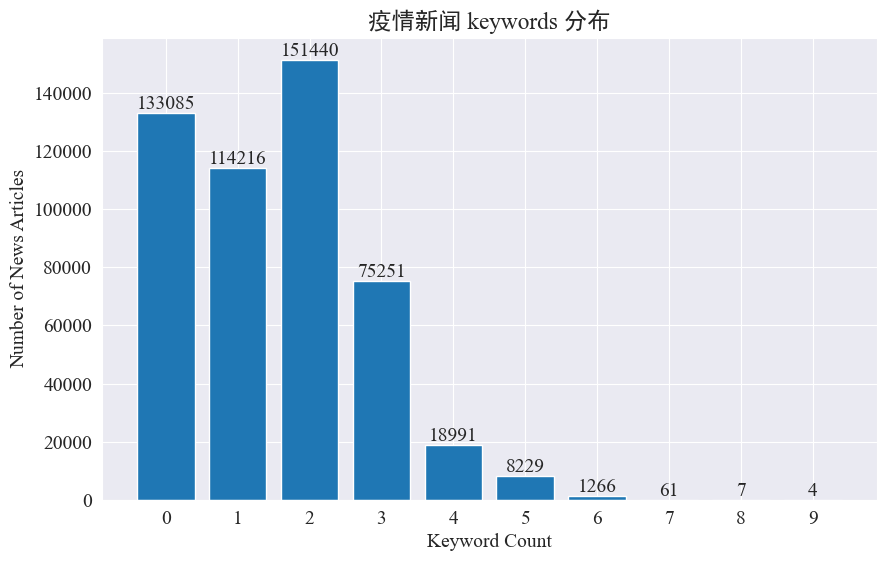

In [5]:
# 创建keyword_count列表
keyword_count = [len(news['keyword']) if isinstance(news['keyword'], list) else 0 for news in news_df.to_dict('records')]

# 计算关键词数量的分布
keyword_count_distribution = pd.Series(keyword_count).value_counts().sort_index()

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(keyword_count_distribution.index, keyword_count_distribution.values)

# 在每个柱头上标出具体数量
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

plt.xlabel('Keyword Count')
plt.ylabel('Number of News Articles')
plt.title('疫情新闻 keywords 分布')
plt.xticks(keyword_count_distribution.index)
plt.show()

In [53]:
import jieba
import jieba.analyse

def extract_keywords(text):
    # 基于jieba的textrank算法实现
    keywords = jieba.analyse.textrank(text,topK=5,withWeight=True)
    return ' '.join([keyword[0] for keyword in keywords])

news_df['keyword_new'] =news_df['content'].map(lambda x: extract_keywords(x))
keyword_data = news_df[['time','keyword','keyword_new']]
keyword_data

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.425 seconds.
Prefix dict has been built successfully.


,time,keyword,keyword_new
0,01-01 00:00,[],衰退 库存 风险 出现 商品
1,01-01 00:01,"[资本市场, 国泰君安]",市场 资本 行业 发展 全面
2,01-01 00:02,[元旦],经济 历史 生活 大江 激荡
3,01-01 00:03,[],房价 研究 是否 措施 发现
4,01-01 00:03,[林郑月娥],香港 警察 警队 月娥 相信
...,...,...,...
502545,08-31 18:25,"[麒麟芯片, 华为]",芯片 麒麟 手机 半导体 记者
502546,08-31 19:15,"[刘作虎, 一加, OPPO]",欧加 手机 控股 有限公司 产品
502547,08-31 14:00,"[信通院, 宽带, 移动数据]",资费 移动 宽带 中国 水平
502548,08-31 19:06,"[一加, 刘作虎, OPPO]",副总裁 创始人 欧加 回归 出任


In [57]:
import os

# 确保目录存在
output_dir = './data/news/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 保存DataFrame到CSV文件
output_file_path = os.path.join(output_dir, 'keyword_data.csv')
keyword_data.to_csv(output_file_path, index=False, encoding='utf-8')


In [59]:
# 合并并去除重复的词
def merge_keywords(row):
    # 将keyword列和keyword_new列合并
    keywords = set(row['keyword']) | set(row['keyword_new'].split())
    return ' '.join(keywords)

keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)
keyword_data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\1548194266.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)


,time,keyword,keyword_new,merged_keywords
0,01-01 00:00,[],衰退 库存 风险 出现 商品,衰退 风险 出现 商品 库存
1,01-01 00:01,"[资本市场, 国泰君安]",市场 资本 行业 发展 全面,全面 资本市场 行业 市场 发展 资本 国泰君安
2,01-01 00:02,[元旦],经济 历史 生活 大江 激荡,元旦 经济 激荡 历史 生活 大江
3,01-01 00:03,[],房价 研究 是否 措施 发现,发现 研究 房价 是否 措施
4,01-01 00:03,[林郑月娥],香港 警察 警队 月娥 相信,警队 林郑月娥 警察 相信 月娥 香港
...,...,...,...,...
502545,08-31 18:25,"[麒麟芯片, 华为]",芯片 麒麟 手机 半导体 记者,麒麟芯片 麒麟 记者 芯片 手机 半导体 华为
502546,08-31 19:15,"[刘作虎, 一加, OPPO]",欧加 手机 控股 有限公司 产品,刘作虎 控股 产品 一加 手机 OPPO 有限公司 欧加
502547,08-31 14:00,"[信通院, 宽带, 移动数据]",资费 移动 宽带 中国 水平,信通院 水平 中国 宽带 资费 移动 移动数据
502548,08-31 19:06,"[一加, 刘作虎, OPPO]",副总裁 创始人 欧加 回归 出任,副总裁 出任 刘作虎 回归 创始人 一加 OPPO 欧加


In [65]:
from datetime import datetime, timedelta
# 将时间转换为datetime格式并加上2020年
keyword_data['time'] = pd.to_datetime('2020-' + keyword_data['time'], format='%Y-%m-%d %H:%M')

# 合并keyword和keyword_new，去重
def merge_keywords(row):
    merged = set(row['keyword']) | set(row['keyword_new'].split())
    return ' '.join(merged)

keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)

# 按时间排序
keyword_data = keyword_data.sort_values(by='time')

# 计算滚动频率
def get_rolling_keyword_freq(df, window=7):
    rolling_keyword_freq = []
    for i in range(len(df)):
        start_time = df.iloc[i]['time'] - timedelta(days=window)
        end_time = df.iloc[i]['time']
        mask = (df['time'] > start_time) & (df['time'] <= end_time)
        recent_data = df.loc[mask]
        keywords = ' '.join(recent_data['merged_keywords']).split()
        keyword_counter = Counter(keywords)
        top_keywords = keyword_counter.most_common(20)
        rolling_keyword_freq.append(dict(top_keywords))
    return rolling_keyword_freq

keyword_data['rolling_keyword_freq'] = get_rolling_keyword_freq(keyword_data)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\254832503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['time'] = pd.to_datetime('2020-' + keyword_data['time'], format='%Y-%m-%d %H:%M')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_5756\254832503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_data['merged_keywords'] = keyword_data.apply(merge_keywords, axis=1)


In [71]:
keyword_df = pd.DataFrame(keyword_data['rolling_keyword_freq'].tolist()).fillna(0)
keyword_df = keyword_df.astype(int)

# 将原始的时间列合并到新的DataFrame中
result_df = pd.concat([keyword_data['time'], keyword_df], axis=1)

# 保存为CSV文件
result_df.to_csv('./data/news/output/keyword_frequency.csv', index=False)

print(result_df.head())

                 time  衰退  风险  出现  商品  库存  全面  资本市场  行业  市场  ...  责任编辑  解读  \
0 2020-01-01 00:00:00   1   1   1   1   1   0     0   0   0  ...     0   0   
1 2020-01-01 00:01:00   1   1   1   1   1   1     1   1   1  ...     0   0   
2 2020-01-01 00:02:00   1   1   1   1   1   1     1   1   1  ...     0   0   
3 2020-01-01 00:03:00   1   1   1   1   1   1     1   1   1  ...     0   0   
4 2020-01-01 00:03:00   1   1   1   1   1   1     1   1   1  ...     0   0   

   精准  财经  政府  警察  海南  检测  证券  美元  
0   0   0   0   0   0   0   0   0  
1   0   0   0   0   0   0   0   0  
2   0   0   0   0   0   0   0   0  
3   0   0   0   0   0   0   0   0  
4   0   0   0   0   0   0   0   0  

[5 rows x 148 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13260\3392989910.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_data = data.groupby('date').sum().reset_index()
C:\Users\Administrator\AppData\Local\Temp\ipykernel_13260\3392989910.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(daily_data.columns[1:])).colors
MovieWriter imagemagick unavailable; using Pillow instead.


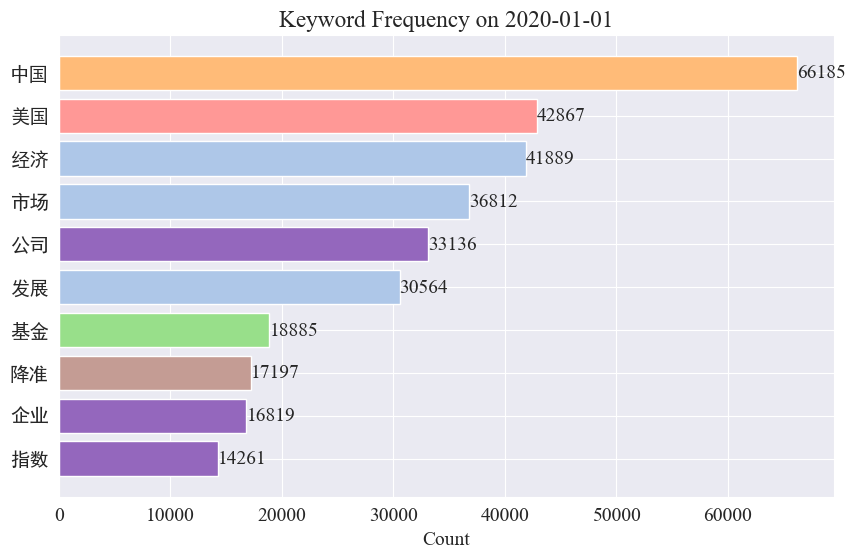

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pyecharts.charts import Bar
from pyecharts import options as opts
from random import randint

# 读取数据
file_path = './data/news/output/keyword_frequency.csv'
data = pd.read_csv(file_path, parse_dates=['time'])

# 聚合数据，按日期合并统计
data['date'] = data['time'].dt.date
daily_data = data.groupby('date').sum().reset_index()

# 准备颜色列表，确保每个关键词都有不同的颜色
colors = plt.cm.get_cmap('tab20', len(daily_data.columns[1:])).colors
color_dict = {keyword: colors[i] for i, keyword in enumerate(daily_data.columns[1:])}

def update(frame):
    plt.clf()
    date = daily_data['date'].iloc[frame]
    day_data = daily_data[daily_data['date'] == date].drop('date', axis=1).T
    day_data.columns = ['count']
    day_data = day_data.sort_values(by='count', ascending=False).head(10)
    
    bars = plt.barh(day_data.index, day_data['count'], color=[color_dict[keyword] for keyword in day_data.index])
    plt.xlabel('Count')
    plt.title(f'Keyword Frequency on {date}')
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', va='center')
    plt.gca().invert_yaxis()

# 创建动画
fig = plt.figure(figsize=(10, 6))
anim = FuncAnimation(fig, update, frames=len(daily_data), repeat=False)

# 保存动画
anim.save('keyword_trend.gif', writer='imagemagick')
